In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [9]:
df=pd.read_csv('emails.csv')

In [10]:
df.head()

Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay   
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0  \
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]

In [11]:
col=df.isnull().sum()
# col[col>=1]
col

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

In [14]:
for i in df.columns:
    for word in stop_words:
        if(i==word):
            df.drop(i,axis=1,inplace=True)

In [15]:
df.shape

(5172, 2868)

In [16]:
x=df.drop(["Prediction","Email No."],axis=1)
y=df["Prediction"]

In [ ]:
x

the  to  ect  and  for  of    a  you  hou  in  ...  enhancements  \
0       0   0    1    0    0   0    2    0    0   0  ...             0   
1       8  13   24    6    6   2  102    1   27  18  ...             0   
2       0   0    1    0    0   0    8    0    0   4  ...             0   
3       0   5   22    0    5   1   51    2   10   1  ...             0   
4       7   6   17    1    5   2   57    0    9   3  ...             0   
...   ...  ..  ...  ...  ...  ..  ...  ...  ...  ..  ...           ...   
5167    2   2    2    3    0   0   32    0    0   5  ...             0   
5168   35  27   11    2    6   5  151    4    3  23  ...             0   
5169    0   0    1    1    0   0   11    0    0   1  ...             0   
5170    2   7    1    0    2   1   28    2    0   8  ...             0   
5171   22  24    5    1    6   5  148    8    2  23  ...             0   

      connevey  jay  valued  lay  infrastructure  military  allowing  ff  dry  
0            0    0       0    0               0         0         0   0    0  
1            0    0       0    0               0         0         0   1    0  
2            0    0       0    0               0         0         0   0    0  
3            0    0       0    0               0         0         0   0    0  
4            0    0       0    0               0         0         0   1    0  
...        ...  ...     ...  ...             ...       ...       ...  ..  ...  
5167         0    0       0    0               0         0         0   0    0  
5168         0    0       0    0               0         0         0   1    0  
5169         0    0       0    0               0         0         0   0    0  
5170         0    0       0    0               0         0         0   1    0  
5171         0    0       0    0               0         0         0   0    0  

[5172 rows x 3000 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [ ]:
x

array([[-0.56544926, -0.64908256, -0.2938948 , ..., -0.0562853 ,
        -0.32904848, -0.07097072],
       [ 0.11575699,  0.71450797,  1.33733653, ..., -0.0562853 ,
         0.03067224, -0.07097072],
       [-0.56544926, -0.64908256, -0.2938948 , ..., -0.0562853 ,
        -0.32904848, -0.07097072],
       ...,
       [-0.56544926, -0.64908256, -0.2938948 , ..., -0.0562853 ,
        -0.32904848, -0.07097072],
       [-0.3951477 ,  0.0851585 , -0.2938948 , ..., -0.0562853 ,
         0.03067224, -0.07097072],
       [ 1.30786793,  1.86831533, -0.0102024 , ..., -0.0562853 ,
        -0.32904848, -0.07097072]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

Y_pred=knn.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_pred)

0.8801932367149758

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       749
           1       0.73      0.89      0.80       286

    accuracy                           0.88      1035
   macro avg       0.84      0.88      0.86      1035
weighted avg       0.89      0.88      0.88      1035



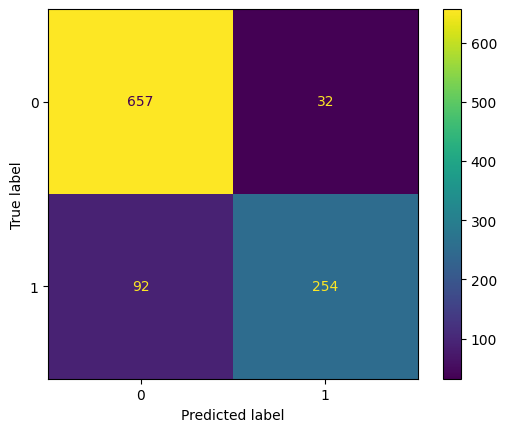

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(Y_pred,y_test)).plot()

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='sigmoid')
svc.fit(x_train,y_train)

Y_pred=svc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_pred)

0.9130434782608695

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       749
           1       0.88      0.80      0.84       286

    accuracy                           0.91      1035
   macro avg       0.90      0.88      0.89      1035
weighted avg       0.91      0.91      0.91      1035



In [ ]:
ConfusionMatrixDisplay(confusion_matrix(Y_pred,y_test)).plot()